# K-Nearest Neighbors
## 1. K-최근접 이웃 알고리즘
- 이해하기 쉽고 매우 효과적인 알고리즘
- 거리 측정 개념을 사용
- 기계학습에서는 데이터 셋은 1. 훈련집합, 2. 테스트 집합으로 나뉨
- 모든 데이터는 분류 항목 표시(labels)이 붙어있음
- 이후 label이 붙어있지 않은 데이터에 대해서 가장 유사한 부류에 분류 하고 label을 붙여줌.
- k-NN은 데이터 집합에서 유사한 k 개의 데이터를 살펴봄
- k개의 가장 유사한 데이터들 중 다수결을 통해 새로운 데이터의 분류 항목을 결정함.
- ex)새로운 데이터와 가장 가까운 (k = 3) 개의 데이터 중 2개가 label: 1 이고 1개가 label: 0 이면 현재 데이터의 label은 1이 된다.

## 2. K-NN 특징
- 장점 : 높은 정확도, 오류 데이터에 둔감, 데이터에 대한 가정이 없음
- 단점 : 계산 비용이 높음, 많은 메모리 요구 ( 현재 데이터에 대해서 모든 데이터와의 거리를 계산하여 k를 추출해야 하기 때문에 )
- 적용 : 수치형 값, 명목형 값

## 3. k-NN 간단한 예제 구현

### 3.1 데이터 불러오기

In [83]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0,1.1], [1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [84]:
group, labels = createDataSet()
print group
print labels

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]]
['A', 'A', 'B', 'B']


### 3.2 k-NN 분류 알고리즘 구현
 1. 데이터 집합에 있는 모든 측정 값 반복
 2. input벡터 x와 데이터 사이의 거리 계산
 3. 오름차순으로 정렬
 4. input 벡터 x와 거리가 가장 짧은 k개의 아이템 추출
 5. k개의 아이템 에서 가장 많은 label 찾기
 6. 현재 input 벡터 x를 분류 하기 위해 가장 많은 label 반환

In [85]:
import math

def classify(InX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0] # 데이터 셋의 크기
    distance = [] 
    for i in range(dataSetSize): # 모든 데이터 셋과의 유클리디안 거리 구하기
        distance.append( sum(pow(InX - dataSet[i],2)) ) 
    
    SortedDistanceIdx = array(distance).argsort()#argsort()함수는 sort 결과에 해당하는 index만 반환
    
    classCount = {}
    for i in range(k): # k개의 아이템에서 가장많은 label 찾기
        votelabel = labels[SortedDistanceIdx[i]] # k번 반복하면서 현재의 label 값 저장
        classCount[votelabel] = classCount.get(votelabel,0) + 1 # 딕셔너리 자료구조에 해당하는 label에 값을 +1 
    
    SortedClassCount = sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True) #딕셔너리에서 2번째 해당하는 값으로 정렬 진행
    return SortedClassCount[0][0]
    #distance.sort() # 오름차순 정렬

In [112]:
print classify([0,0],group,labels,3)

B


## 4. k-NN을 이용하여 데이트 사이트의 만남 주선
- 데이트 했던 사람들에게 3가지 유형이 존재 ( 1. 좋아하지 않았던 사람들, 2. 조금 좋아했던 사람들, 3. 많이 좋아했던 사람들)
- 무엇에 의해 이러한 유형이 결정되는 지 알 수 없음
- 현 예제에서는 (1. 연간 비행기 마일리지, 2. 비디오 게임 시간, 3. 주당 아이스크림 소비량(리터)) 지표 사용


### 4.1 텍스트 파일 불러오기

In [86]:
from numpy import * 

def file2matrix(filename):
    fr = open(filename)
    numofLines = len(fr.readlines())## 파일의 줄수 구하기
    
    returnMat = zeros((numofLines,3))# 반환 매트릭스 초기화 파일의 라인 수와 지표의 갯수 3개 초기화
   
    classLabelVector = []
    
    fr = open(filename)
    index = 0
    
    for line in fr.readlines():
        line.strip()
        listFromLine = line.split('\t')# tab을 기준으로 데이터를 자름
        
        returnMat[index,:] = listFromLine[0:3] ## 현재 인덱스에 0~ 3 개의 데이터를 삽입
        classLabelVector.append(listFromLine[-1]) # 맨 마지막 데이터를 집어넣음
        index += 1
        
    return returnMat , classLabelVector

In [87]:
datingDataMat,datingLabels = file2matrix('datingTestSet.txt')

print datingDataMat
print datingLabels

[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]
['largeDoses\n', 'smallDoses\n', 'didntLike\n', 'didntLike\n', 'didntLike\n', 'didntLike\n', 'largeDoses\n', 'largeDoses\n', 'didntLike\n', 'largeDoses\n', 'didntLike\n', 'didntLike\n', 'smallDoses\n', 'didntLike\n', 'didntLike\n', 'didntLike\n', 'didntLike\n', 'didntLike\n', 'smallDoses\n', 'largeDoses\n', 'smallDoses\n', 'didntLike\n', 'smallDoses\n', 'largeDoses\n', 'smallDoses\n', 'largeDoses\n', 'smallDoses\n', 'largeDoses\n', 'smallDoses\n', 'didntLike\n', 'largeDoses\n', 'didntLike\n', 'largeDoses\n', 'didntLike\n', 'smallDoses\n', 'didntLike\n', 'didntLike\n', 'smallDoses\n', 'largeDoses\n', 'largeDoses\n', 'didntLike\n', 'smallDoses\n', 'largeDoses\n'

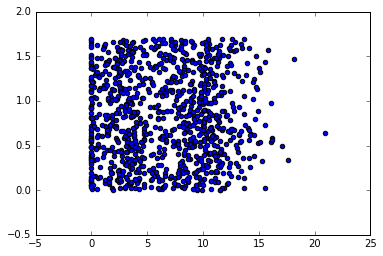

In [88]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])   # 1 col and 2 col
plt.show()

### 4.2 수치형 정규화
- 항목마다 값의 범위가 다르기 때문에 비교를 해주기 위해서 정규화를 해주어야함
- 각 항목의 점수를 0~ 1 또는 -1 ~ 1로 오도록 해야함
- 정규화 식 : newValue = (oldValue - min ) / (max - min)

In [89]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet / tile(ranges,(m,1))
    return normDataSet, ranges, minVals

In [90]:
normMat,ranges,minVals=autoNorm(datingDataMat)
print normMat
print ranges
print minVals

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
[  9.12730000e+04   2.09193490e+01   1.69436100e+00]
[ 0.        0.        0.001156]


### 4.3 전체 데이터로 분류기 검사하기
- 알고리즘의 성능 평가 방법
- 현재의 가지고 있는 데이터의 일부분, 90% 정도를 가지고 분류기의 학습에 사용
- 나머지 10%를 가지고 분류기의 성능 검사

In [99]:
hoRatio=0.10 
datingDataMat,datingLabels=file2matrix('datingTestSet2.txt') 
normMat,ranges,minVals=autoNorm(datingDataMat) 
m=normMat.shape[0]     
numTestVecs=int(m*hoRatio) 
errorCount=0.0 
for i in range(numTestVecs): 
    classifierResult = classify(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3) 
    # normMat[i,:] only i-th row  
    # normMat[numTestVecs:m,:]  101~999 th row  
    print "the classifier came back with:%s, the real answer is: %s" % (classifierResult,datingLabels[i]) 
    if(classifierResult!=datingLabels[i]): errorCount+=1.0 

print "the total error rate is : %f" %(errorCount/float(numTestVecs)) 


the classifier came back with:3
, the real answer is: 3

the classifier came back with:2
, the real answer is: 2

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1
, the real answer is: 1

the classifier came back with:3
, the real answer is: 3

the classifier came back with:3
, the real answer is: 3

the classifier came back with:1
, the real answer is: 1

the classifier came back with:3
, the real answer is: 3

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1
, the real answer is: 1

the classifier came back with:2
, the real answer is: 2

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1
, the real answer is: 1

the classifier came back with:1

### 4.4 시스템 제작
- 사람의 정보를 입력 ( 현재 데이터에서는 1. 비행기 마일리지,2. 비디오 게임 시간의 비율, 3. 한 주에 아이스크림 먹는 양) 
- 그 사람을 안좋아할지, 조금 좋아할지, 많이 좋아할지 결과 리턴

In [101]:
resultList=['not at all','in small doses','in large doses'] 
percentTats=float(raw_input("percentage of time spent playing video games?")) 
ffMiles=float(raw_input("frequent flier miles earned per year?")) 
iceCream=float(raw_input("listers of ice cream consumed per year?")) 
datingDataMat,datingLabels=file2matrix("datingTestSet2.txt") 

normMat,ranges,minVals=autoNorm(datingDataMat) 

inArr=array([ffMiles,percentTats,iceCream]) 

classifierResult=classify((inArr-minVals)/ranges,normMat,datingLabels,3) 

print "You will probably like this person: ",resultList[int(classifierResult)-1] 


percentage of time spent playing video games?5
frequent flier miles earned per year?10000
listers of ice cream consumed per year?0.5
You will probably like this person:  in small doses


# 5. 필기체 인식

In [115]:
from os import listdir

def img2Vector(filename): 
    returnVect=zeros((1,1024))    # 1024=32*32 
    fr=open(filename) 
    for i in range(32): 
        lineStr=fr.readline() 
        for j in range(32): 
            returnVect[0,32*i+j]=int(lineStr[j]) 
    return returnVect 

def handwritingClassTest(): 
    hwLabels=[] 
    trainingFileList=listdir('trainingDigits') 
    m=len(trainingFileList) 
    trainingMat=zeros((m,1024)) 
    for i in range(m): 
        fileNameStr=trainingFileList[i] 
        fileStr=fileNameStr.split('.')[0] 
        classNumStr=int(fileStr.split('_')[0]) 
        hwLabels.append(classNumStr) # class 추가
        trainingMat[i,:]=img2Vector('trainingDigits/%s' % fileNameStr) # 숫자 벡터를 trainingmat에 추가
    testFileList=listdir('testDigits') 
    errorCount=0.0 
    mTest=len(testFileList) 
    for i in range(mTest): 
        fileNameStr=testFileList[i] 
        fileStr=fileNameStr.split('.')[0] 
        classNumStr=int(fileStr.split('_')[0]) 
        vectorUnderTest=img2vector('testDigits/%s' % fileNameStr) 
        classifierResult=classify(vectorUnderTest,trainingMat,hwLabels,3) 
        print "the classifier came back with: %d, the real answer is: %d" %(classifierResult,classNumStr) 
        if(classifierResult!=classNumStr): errorCount+=1.0 
    print "\nthe total number of errors is: %d" % errorCount 
    print "\nthe total error rate is: %f" % (errorCount/float(mTest)) 


In [116]:
testvector =img2Vector('testDigits/0_13.txt')
print testvector

[[ 0.  0.  0. ...,  0.  0.  0.]]


In [117]:
handwritingClassTest()

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe